<a href="https://colab.research.google.com/github/aishuse/Machine-Learning-Projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Processing¶


In [3]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [6]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df.drop(['Cabin','Name','PassengerId'], axis=1, inplace=True)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [9]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['Sex'] = en.fit_transform(df['Sex'])
df['Ticket'] = en.fit_transform(df['Ticket'])
df['Embarked'] = en.fit_transform(df['Embarked'])

In [10]:
x = df.iloc[:,1:]
y= df.iloc[:,0]

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,28.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


In [12]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.104057
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.014205
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.038322
Ticket,-0.164549,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.006041
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.006041,-0.221226,1.000000


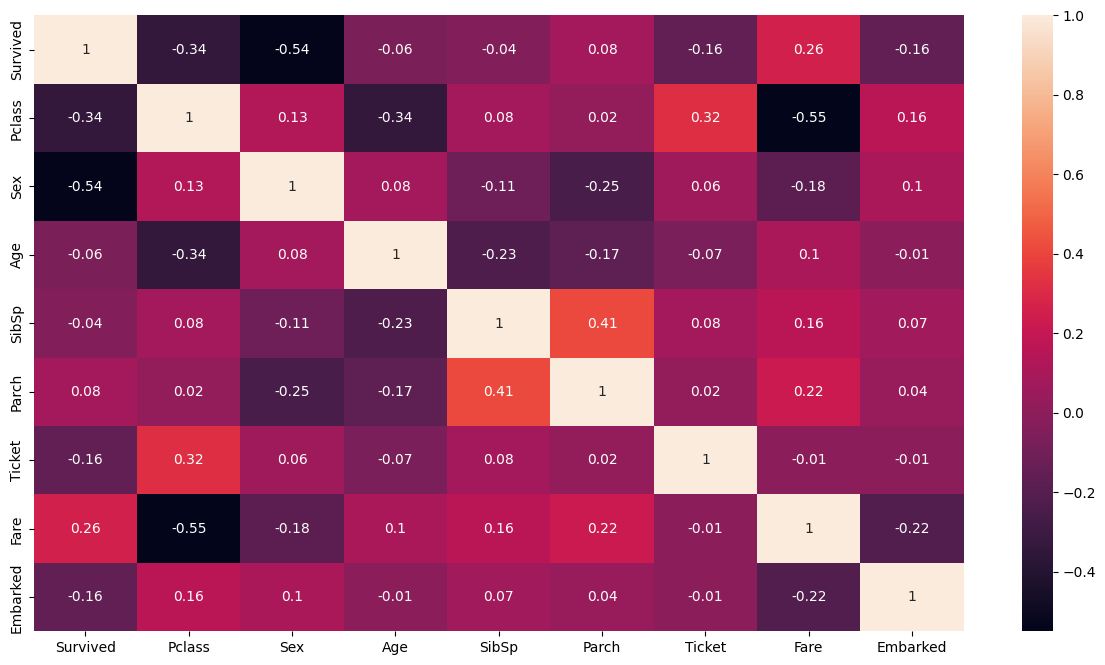

In [13]:
import matplotlib.pyplot as mlt
import seaborn as sns
corr=df.corr().round(2)
mlt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
mlt.show()

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,28.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
mi = MinMaxScaler()
x = mi.fit_transform(x)


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=1)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier(algorithm= 'auto', weights='uniform')
k.fit(xtrain, ytrain)


KNeighborsClassifier()

In [18]:
ypred=k.predict(xtest)

In [19]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(ytest,ypred))

0.7653631284916201


In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       106
           1       0.79      0.58      0.67        73

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.74       179
weighted avg       0.77      0.77      0.76       179



In [21]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [22]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

s = SVC()
m = MultinomialNB()

models = [s,m]

for i in models:
  i.fit(xtrain,ytrain)
  ypred=i.predict(xtest)
  print(i, accuracy_score(ytest,ypred))

SVC() 0.776536312849162
MultinomialNB() 0.6256983240223464


In [23]:
ypred1=m.predict(mi.fit_transform([[1,0,38.0,0,0,596,71.9250,0]]))
ypred1

array([0])

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,28.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
pred = rf.predict(xtest)
print(accuracy_score(ytest,pred))

0.8156424581005587


In [26]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors':[3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute']
}

clf = GridSearchCV(k,params,cv=10, scoring='accuracy')
clf.fit(xtrain,ytrain)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}
